## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm 
import pylab as py 

## Import Data

In [2]:
df = pd.read_csv(r'deepq_ai_assignment_data.csv')

In [3]:
### Show the data
pd.set_option('display.max_columns', None)
df.head()

,UID,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,Target_ChurnFlag,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,1003904-3746,14 month lease,1103.0,2015-01-08,2016-02-28,2015-07-30,2015-01-08,2015-01-08,2015-07-30,2015-07-01,NaN,False,NaN,1103.0,0,0,1,NaN,13,1-3 years,1,16,6,1,0,0,0,0,1,1,2016,2015-01-08,2015-07-30,0,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2206.0,-1.0,-1.0,1,1,1,0,1,0,1,0,0,1,25,NaN,NaN,46.120308,25.0,25,25,0,1,42000.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,15,0,9,11.133333,5,14,1,7,0.555556,5,0,9,0,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,2015-01-01,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.6625,0.600000
1,1003904-3751,12 month lease,1136.0,2015-01-24,2016-01-17,NaN,2003-09-11,2003-09-11,NaN,NaN,NaN,False,NaN,1136.0,0,0,1,2016-01-18,12,6-12 months,13,15,7,0,0,0,0,0,1,0,2016,2015-01-24,2016-01-17,0,0,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2272.0,-1.0,-1.0,1,1,1,0,1,0,0,1,0,1,46,NaN,NaN,-1.000000,46.0,46,46,0,0,0.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,0,7,8.285714,4,12,0,16,0.176471,7,0,17,1,14,0,2,8.214286,4,13,0,16,0.176471,7,0,17,1,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,2015-01-01,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.0,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.6625,0.142857
2,1003904-3756,12 month lease,1382.0,2015-02-20,2016-02-21,2016-02-21,2015-02-20,2015-02-20,NaN,NaN,NaN,False,NaN,1382.0,0,0,1,2016-02-22,12,6-12 months,1,14,7,1,0,0,0,0,1,0,2016,2015-02-20,2016-02-21,0,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2764.0,-1.0,-1.0,3,3,2,1,2,1,1,1,0,2,41,Full Time Homemaker,Retired,0.000000,44.0,41,47,1,2,66360.0,Full Time Homemaker,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,13,0,10,11.384615,6,17,1,20,0.714286,15,0,21,1,40004,240,A

In [4]:
## tail of the data
df.tail()

,UID,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,Target_ChurnFlag,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
167015,4555777-1709,12 month lease,1823.0,2020-05-23,2021-05-23,2021-05-23,2020-05-23,2020-05-23,2021-05-23,2021-03-03,NaN,False,NaN,1823.0,0,0,1,NaN,12,6-12 months,3,3,2,0,0,0,0,0,1,1,2021,2020-05-23,2021-05-23,0,0,2726.0,-0.331255,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,18,17,1,17,9,1,6,2.470588,1.722222,18,0,0,0,0,0,5,3,1,0,4,0,0,5,0,1,0,0,3646.00,5452.0,-0.331255,6,5,2,1,2,3,0,1,0,2,53,NaN,NaN,-1.0,70.0,37,120,0,6,0.0,NaN,9,3,10,0,1,1,0,0,1,785.0,785.0,2.0,1.0,1,2,13.5,12,15,0,7,1.666667,3,0,6,1,2,0,1,12.5,10,15,0,20,1.263158,10,0,19,1,12107,914,ACTIVE,Norwood,MA,02062-2433,12107,Boston,B,Garden,suburban,West Norfolk County,-1,-1,-1,-1,-1,"Boston-Cambridge-Newton, MA-NH",West Norfolk County,0.9529,2096.0,-0.020200,2020-Q2,2020-04-01,1996.5,1996.5,0.913098,0.913098,1.500000,1.416667,0.083333,1.416667,0.750000,0.083333,0.500000,0.205882,0.143519,1.500000,0.0,0.0,0.0,0.0,0.0,0.416667,0.250000,0.083333,0.000000,0.333333,0.0,0.000000,0.416667,0.000000,10.0,0.631579,5.0,0.0,9.5,0.5,2.333333,0.555556,1.0,0.0,2.0,0.333333,2.0,2.322293,0.400000,-0.001094,0.5
167016,4555777-1817,13 month lease,1868.0,2020-07-20,2021-08-15,2020-10-17,2020-07-20,2020-07-20,2020-10-17,2020-08-31,NaN,False,NaN,1868.0,0,0,1,2020-10-17,13,1-3 years,1,2,2,1,0,0,0,0,1,0,2021,2020-07-20,2020-10-17,0,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,7.0,1.0,1.0,7.0,4.0,-1.0,-1.0,1,22,21,2,21,9,2,5,2.476191,1.565217,23,0,0,0,0,0,6,2,4,0,4,0,2,4,1,1,0,0,2048.78,-1.0,-1.000000,2,2,1,1,1,1,0,1,0,1,37,NaN,NaN,-1.0,25.5,14,37,1,1,0.0,NaN,7,3,8,0,1,1,0,0,1,850.0,850.0,2.0,1.0,-1,-1,-1.0,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,1,1,0,13.0,13,13,0,8,0.000000,0,0,7,1,12107,914,ACTIVE,Norwood,MA,02062-2433,12107,Boston,B,Garden,suburban,West Norfolk County,-1,-1,-1,-1,-1,"Boston-Cambridge-Newton, MA-NH",West Norfolk County,0.9588,2115.0,0.009100,2020-Q3,2020-07-01,1996.5,1996.5,0.935637,0.935637,1.692308,1.615385,0.153846,1.615385,0.692308,0.153846,0.384615,0.190476,0.120401,1.769231,0.0,0.0,0.0,0.0,0.0,0.461538,0.153846,0.307692,0.000000,0.307692,0.0,0.153846,0.307692,0.076923,8.0,0.000000,0.0,0.0,7.0,1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,2.0,2.197647,1.000000,-0.001094,1.0
167017,4555777-2026,12 month lease,1729.0,2020-08-12,2021-08-01,2020-10-16,2018-04-17,2018-04-17,2020-10-16,2020-08-20,NaN,False,NaN,1729.0,0,0,1,NaN,12,6-12 months,2,2,2,0,0,0,0,0,1,1,2021,2020-08-12,2020-10-16,0,0,1677.0,0.031008,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,1,1,1,1,0,0,1,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2230.96,3354.0,-0.334836,3,3,2,1,2,1,0,0,0,2,120,NaN,NaN,-1.0,120.0,120,120,0,3,0.0,NaN,8,2,9,0,0,1,0,0,1,850.0,850.0,2.0,1.0,0,1,13.0,13,13,1,18,2.055556,8,0,18,1,1,0,0,13.0,13,13,1,18,2.055556,8,0,18,1,12107,914,ACTIVE,Norwood,MA,02062-2433,12107,Boston,B,Garden,suburban,West Norfolk County,-1,-1,-1,-1,-1,"Boston-Cambridge-Newton, MA

## About the Data

In [5]:
## shape of the data
df.shape

(167020, 217)

In [6]:
## checking for data type
for column in df.columns:
    print(f'Column {column} has data type {df[column].dtype}')

Column UID has data type object
Column X0 has data type object
Column X1 has data type float64
Column X2 has data type object
Column X3 has data type object
Column X4 has data type object
Column X5 has data type object
Column X6 has data type object
Column X7 has data type object
Column X8 has data type object
Column X9 has data type object
Column X10 has data type bool
Column X11 has data type float64
Column X12 has data type float64
Column X13 has data type int64
Column X14 has data type int64
Column X15 has data type int64
Column X16 has data type object
Column X17 has data type int64
Column X18 has data type object
Column X19 has data type int64
Column X20 has data type int64
Column X21 has data type int64
Column X22 has data type int64
Column X23 has data type int64
Column X24 has data type int64
Column X25 has data type int64
Column X26 has data type int64
Column X27 has data type int64
Column Target_ChurnFlag has data type int64
Column X29 has data type int64
Column X30 has data

## Data Cleaning

#### Dropping Duplicate columns

In [7]:
# saving the original datatypes and their columns
original_data_types = df.dtypes
original_column_names = df.columns

In [8]:
print(f'No of columns in data before removing duplicate values: {len(original_column_names)}')

No of columns in data before removing duplicate values: 217


In [9]:
# Identify and drop columns with duplicated values
df = df.T.drop_duplicates().T

In [10]:
# saving the columns after deleting duplicate values
new_column_names = df.columns
duplicated_columns = list(set(original_column_names)-set(new_column_names))
print(f'No of columns in data after removing duplicate values: {len(new_column_names)}')
print(f'No of duplicated columns in the dataset: {len(duplicated_columns)}')

No of columns in data after removing duplicate values: 201
No of duplicated columns in the dataset: 16


In [11]:
## checking for data type
for column in df.columns:
    print(f'Column {column} has data type {df[column].dtype}')

Column UID has data type object
Column X0 has data type object
Column X1 has data type object
Column X2 has data type object
Column X3 has data type object
Column X4 has data type object
Column X5 has data type object
Column X6 has data type object
Column X7 has data type object
Column X8 has data type object
Column X9 has data type object
Column X10 has data type object
Column X11 has data type object
Column X12 has data type object
Column X15 has data type object
Column X16 has data type object
Column X17 has data type object
Column X18 has data type object
Column X19 has data type object
Column X20 has data type object
Column X21 has data type object
Column X22 has data type object
Column X23 has data type object
Column X24 has data type object
Column Target_ChurnFlag has data type object
Column X29 has data type object
Column X30 has data type object
Column X31 has data type object
Column X34 has data type object
Column X35 has data type object
Column X36 has data type object
Colum

In [12]:
## Now here one problem occurs i.e the data types became change after droping the duplicate columns, so we will handle this
## by mapping back original data types to the new dataframe

In [13]:
## converting original_data_types into dictionary and filtering only the column which needs to be change after removing duplicates
original_data_types = original_data_types.to_dict()
filtered_original_data_type = {key: value for key, value in original_data_types.items() if key not in duplicated_columns}

In [14]:
## Mappling the data types into the new dataframe after removing duplicates
for column, data_type in filtered_original_data_type.items():
    df[column] = df[column].astype(data_type)

In [15]:
## Now checking for data type again
for column in df.columns:
    print(f'Column {column} has data type {df[column].dtype}')

Column UID has data type object
Column X0 has data type object
Column X1 has data type float64
Column X2 has data type object
Column X3 has data type object
Column X4 has data type object
Column X5 has data type object
Column X6 has data type object
Column X7 has data type object
Column X8 has data type object
Column X9 has data type object
Column X10 has data type bool
Column X11 has data type float64
Column X12 has data type float64
Column X15 has data type int64
Column X16 has data type object
Column X17 has data type int64
Column X18 has data type object
Column X19 has data type int64
Column X20 has data type int64
Column X21 has data type int64
Column X22 has data type int64
Column X23 has data type int64
Column X24 has data type int64
Column Target_ChurnFlag has data type int64
Column X29 has data type int64
Column X30 has data type object
Column X31 has data type object
Column X34 has data type float64
Column X35 has data type float64
Column X36 has data type float64
Column X37 

In [16]:
## Now checking for null values
for i in df.columns:
    print(f"{i} : {df[i].isnull().sum()}")

UID : 0
X0 : 0
X1 : 0
X2 : 0
X3 : 0
X4 : 84400
X5 : 0
X6 : 0
X7 : 92761
X8 : 95579
X9 : 158340
X10 : 0
X11 : 167020
X12 : 0
X15 : 0
X16 : 66919
X17 : 0
X18 : 0
X19 : 0
X20 : 0
X21 : 0
X22 : 0
X23 : 0
X24 : 0
Target_ChurnFlag : 0
X29 : 0
X30 : 0
X31 : 0
X34 : 0
X35 : 0
X36 : 0
X37 : 0
X38 : 0
X39 : 0
X40 : 0
X41 : 0
X42 : 0
X43 : 0
X44 : 0
X45 : 0
X47 : 0
X49 : 0
X50 : 0
X51 : 0
X52 : 0
X53 : 0
X54 : 0
X55 : 0
X56 : 0
X57 : 0
X58 : 0
X59 : 0
X60 : 0
X62 : 0
X63 : 0
X64 : 0
X65 : 0
X66 : 0
X67 : 0
X68 : 0
X70 : 0
X71 : 0
X73 : 0
X74 : 0
X75 : 0
X76 : 0
X77 : 0
X78 : 0
X79 : 0
X80 : 0
X81 : 0
X82 : 0
X83 : 0
X84 : 0
X85 : 37511
X86 : 0
X87 : 0
X88 : 0
X89 : 0
X90 : 0
X91 : 0
X92 : 0
X93 : 0
X94 : 0
X95 : 0
X96 : 0
X97 : 0
X98 : 0
X99 : 123888
X100 : 137026
X101 : 0
X102 : 0
X103 : 0
X104 : 0
X105 : 0
X106 : 0
X107 : 0
X108 : 107416
X109 : 0
X110 : 0
X111 : 0
X112 : 0
X113 : 0
X114 : 0
X115 : 0
X116 : 0
X117 : 0
X118 : 0
X119 : 0
X120 : 0
X121 : 0
X122 : 0
X123 : 0
X124 : 0
X125 : 0
X126 :

#### Missing value handle

In [17]:
## Dropping one category columns and all NaN valued columns

all_nan_columns = df.columns[df.isna().all()]
count_all_nan_columns = len(all_nan_columns)

df = df.dropna(axis=1, how='all')

# Also removing columns with only one category as follows
one_cat_feature = 0
for column in df.columns:
    if len(df[column].unique()) == 1:
        one_cat_feature += 1
        df.drop(column, axis=1, inplace=True)
        
print(f"No of columns for which all values are NaN: {count_all_nan_columns}")
print(f"No of columns for which only one category present: {one_cat_feature}")

No of columns for which all values are NaN: 1
No of columns for which only one category present: 4


In [18]:
## checking for null values
for i in df.columns:
    print(f"{i} : {df[i].isnull().sum()}")

UID : 0
X0 : 0
X1 : 0
X2 : 0
X3 : 0
X4 : 84400
X5 : 0
X6 : 0
X7 : 92761
X8 : 95579
X9 : 158340
X12 : 0
X16 : 66919
X17 : 0
X18 : 0
X19 : 0
X20 : 0
X21 : 0
X22 : 0
X23 : 0
X24 : 0
Target_ChurnFlag : 0
X29 : 0
X30 : 0
X31 : 0
X34 : 0
X35 : 0
X36 : 0
X37 : 0
X38 : 0
X39 : 0
X40 : 0
X41 : 0
X42 : 0
X43 : 0
X44 : 0
X47 : 0
X49 : 0
X50 : 0
X51 : 0
X52 : 0
X53 : 0
X54 : 0
X55 : 0
X56 : 0
X57 : 0
X58 : 0
X59 : 0
X60 : 0
X62 : 0
X63 : 0
X64 : 0
X65 : 0
X66 : 0
X67 : 0
X68 : 0
X70 : 0
X71 : 0
X73 : 0
X74 : 0
X75 : 0
X76 : 0
X77 : 0
X78 : 0
X79 : 0
X80 : 0
X81 : 0
X82 : 0
X83 : 0
X84 : 0
X85 : 37511
X86 : 0
X87 : 0
X88 : 0
X89 : 0
X90 : 0
X91 : 0
X92 : 0
X93 : 0
X94 : 0
X95 : 0
X96 : 0
X97 : 0
X98 : 0
X99 : 123888
X100 : 137026
X101 : 0
X102 : 0
X103 : 0
X104 : 0
X105 : 0
X106 : 0
X107 : 0
X108 : 107416
X109 : 0
X110 : 0
X111 : 0
X112 : 0
X113 : 0
X114 : 0
X115 : 0
X116 : 0
X117 : 0
X118 : 0
X119 : 0
X120 : 0
X121 : 0
X122 : 0
X123 : 0
X124 : 0
X125 : 0
X126 : 0
X127 : 0
X128 : 0
X129 : 0
X130 : 

In [19]:
## storing date time columns

df_datetime = df[['X2','X3','X4','X5','X6','X7','X8','X9','X16','X29','X30','X31','X169','X170']]

In [20]:
df = df.drop(list(df_datetime.columns),axis=1)

In [21]:
missing_value_column = [i for i in df.columns if df[i].isnull().sum() != 0]

In [22]:
missing_value_column

['X85', 'X99', 'X100', 'X108', 'X164', 'X165']

In [23]:
## As X99,X100,X108 giving same information we are combining the categories based on the max category occur in this three column

In [24]:
def find_combined_column(df):
    category_counts = []
    max_categories = []

    for index, row in df.iterrows():
        category_count = {}
        for column in df.columns:
            category = row[column]
            if category != 'NA':
                if category in category_count:
                    category_count[category] += 1
                else:
                    category_count[category] = 1
        category_counts.append(category_count)
        max_cat = max(category_count, key=category_count.get, default=None)
        max_categories.append(max_cat)

    result_df = pd.DataFrame({'X99_X100_X108': max_categories})

    return result_df

In [25]:
df1 = df[['X99','X100','X108']]

In [26]:
df['X99_X100_X108'] = find_combined_column(df1)['X99_X100_X108']

In [27]:
print(f"Missing values present in combined column: {df['X99_X100_X108'].isnull().sum()}")

Missing values present in combined column: 107416


In [28]:
## missing value handle for this combined column of X99.X100,X108

df['X99_X100_X108'].fillna(df['X99_X100_X108'].mode()[0],inplace=True)

In [29]:
print(f"After handling missing value the no of null values in combined column: {df['X99_X100_X108'].isnull().sum()}")

After handling missing value the no of null values in combined column: 0


In [30]:
print(f"No of missing values in X164 is {df['X164'].isnull().sum()}")
print(f"No of missing values in X165 is {df['X165'].isnull().sum()}")

No of missing values in X164 is 145
No of missing values in X165 is 145


In [31]:
## we will drop X165 column because X158 column is completely giving same information
## and all the missing labels are present in X158 column

df.drop(columns='X165',axis=1,inplace=True)

In [32]:
## Now We will handle the missing value of X164 after combining the columns X150,X154,X158 and X151
## This code will check for missing value present in X164 column or not, then it will replace the missing value with the combined value
for index, row in df.iterrows():
    if pd.isna(row['X164']):
        replace_value = df.loc[index,'X150'] + '-' + df.loc[index,'X154'] + '-' + df.loc[index,'X158'] + ',' + df.loc[index,'X151']
        df.loc[index, 'X164'] = replace_value

In [33]:
## Now checking for missing values after imputation of X164 column
print(f"Missing value present in X164 column after imputation: {df['X164'].isnull().sum()}")

Missing value present in X164 column after imputation: 0


In [34]:
## Missing value handle for X85 column
print(f"Missing value present in X85 column: {df['X85'].isnull().sum()}")

Missing value present in X85 column: 37511


<Axes: xlabel='X85', ylabel='Density'>

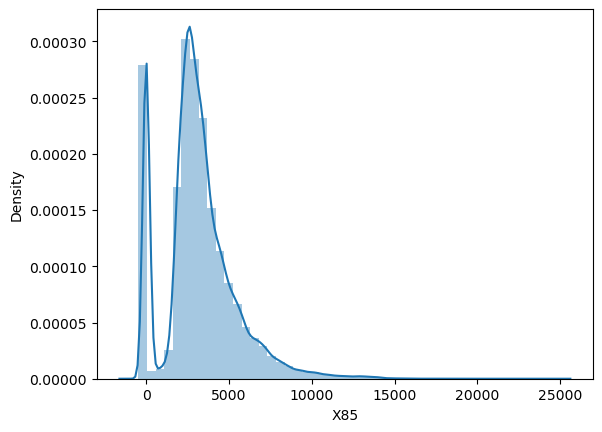

In [35]:
## showing the distribution of X85 column
sns.distplot(df['X85'])

In [36]:
## seeing the summary statistics of the column
df['X85'].describe()

count    129509.000000
mean       3179.036785
std        2178.384166
min        -993.500000
25%        2102.000000
50%        2938.000000
75%        4136.000000
max       25000.000000
Name: X85, dtype: float64

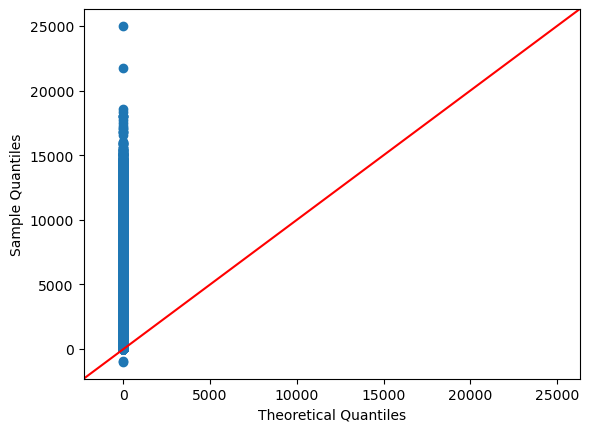

In [37]:
## checking for qq plot
sm.qqplot(df['X85'], line ='45') 
py.show() 

In [38]:
## Insights: We can clearly see that these datapoints are not following normal distribution
## So we will impute this column with median value
df['X85'].fillna(df['X85'].median(),inplace=True)

In [39]:
## Now checking for missing values after imputation of X85 column
print(f"Missing value present in X85 column after imputation: {df['X85'].isnull().sum()}")

Missing value present in X85 column after imputation: 0


In [40]:
### dropping unnecessary column
df = df.drop(['UID','X152','X99','X100','X108','X150','X151','X154','X158'],axis=1)

In [41]:
print(f"No of missing value in the dataframe: {df.isnull().sum().sum()}")

No of missing value in the dataframe: 0


In [42]:
df

,X0,X1,X12,X17,X18,X19,X20,X21,X22,X23,X24,Target_ChurnFlag,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X47,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X62,X63,X64,X65,X66,X67,X68,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X101,X102,X103,X104,X105,X106,X107,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X155,X156,X157,X159,X160,X161,X162,X163,X164,X166,X167,X168,X171,X172,X173,X174,X175,X176,X177,X179,X180,X181,X182,X183,X184,X185,X187,X188,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X99_X100_X108
0,14 month lease,1103.0,1103.0,13,1-3 years,1,16,6,1,0,0,1,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2206.00,-1.0,-1.000000,1,1,1,0,1,0,1,0,0,1,25,46.120308,25.0,25,25,0,1,42000.0,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,15,0,9,11.133333,5,14,1,7,0.555556,5,0,9,0,40004,240,B,Garden,suburban,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",0.9535,1144.0,0.007000,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.662500,0.600000,Professional
1,12 month lease,1136.0,1136.0,12,6-12 months,13,15,7,0,0,0,0,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2272.00,-1.0,-1.000000,1,1,1,0,1,0,0,1,0,1,46,-1.000000,46.0,46,46,0,0,0.0,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,0,7,8.285714,4,12,0,16,0.176471,7,0,17,1,14,0,2,8.214286,4,13,0,16,0.176471,7,0,17,1,40004,240,B,Garden,suburban,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",0.9535,1144.0,0.007000,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.000000,0.000000,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.662500,0.142857,Professional
2,12 month lease,1382.0,1382.0,12,6-12 months,1,14,7,1,0,0,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2764.00,-1.0,-1.000000,3,3,2,1,2,1,1,1,0,2,41,0.000000,44.0,41,47,1,2,66360.0,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,13,0,10,11.384615,6,17,1,20,0.714286,15,0,21,1,40004,240,B,Garden,suburban,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",0.9535,1144.0,0.007000,1472.0,1472.0,0.938859,0.938859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.538462,0.054945,1.153846,0.0,1.615385,0.076923,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.303774,0.666667,1.662500,0.769231,Full Time Homemaker
3,14 month lease,2417.0,1135.0,14,1-3 years,1,13,8,1,0,0,1,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,5,6,2,3,0,2,1.666667,0.666667,6,0,0,0,0,4,0,1,0,0,0,1,0,1,0,1,2270.00,-1.0,-1.000000,1,1,1,0,1,0,0,0,0,1,28,-1.000000,28.0,28,28,0,1,0.0,9,4,8,0,0,1,1,1,3,714.0,714.0,1.0,1.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,12,1,8,8.666667,2,14,2,54,1.293103,43,0,58,4,40004,240,B,Garden,suburban,0,312,16,7

#### Outlier Detection

In [43]:
numerical_col = [i for i in df.columns if df[i].dtype in ('int64','float64')]

In [44]:
len(numerical_col)

166

In [45]:
def detect_outliers_iqr(df):
    outliers_count = []
    
    for column in df.columns:
        if df[column].dtype != 'object':  # Exclude non-numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Count the number of outliers in the column
            num_outliers = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])

            outliers_count.append((column, num_outliers))

    # Create a new DataFrame to store the results
    result_df = pd.DataFrame(outliers_count, columns=['Column', 'No_of_Outliers'])
    return result_df

In [46]:
outliers_result = detect_outliers_iqr(df[numerical_col])

In [47]:
outliers_result

,Column,No_of_Outliers
0,X1,8278
1,X12,8223
2,X17,5825
3,X19,10351
4,X20,33
...,...,...
161,X211,37079
162,X212,11529
163,X213,18729
164,X214,0


In [48]:
## These are the columns which dont have outliers
outliers_result[outliers_result['No_of_Outliers'] == 0]

,Column,No_of_Outliers
6,X22,0
9,Target_ChurnFlag,0
23,X50,0
26,X53,0
27,X54,0
30,X57,0
52,X82,0
61,X91,0
88,X121,0
98,X131,0


#### Now we will handle the outlier
* We will replace those values which are less than lower bound as lower bound
* And those values which are greater than upper bound as upper bound

In [49]:
def impute_outliers_iqr(dataframe, threshold=1.5):
    """
    Impute outlier values in a DataFrame column-wise using the IQR method.

    Parameters:
    - dataframe: The DataFrame containing the data.
    - threshold: The threshold multiplier for the IQR (default is 1.5).

    Returns:
    - A DataFrame with outliers imputed within the specified bounds.
    """
    df_copy = dataframe.copy()  # Create a copy to avoid modifying the original DataFrame

    for column in df_copy.columns:
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Impute values below the lower bound with the lower bound
        df_copy.loc[df_copy[column] < lower_bound, column] = lower_bound

        # Impute values above the upper bound with the upper bound
        df_copy.loc[df_copy[column] > upper_bound, column] = upper_bound

    return df_copy

In [50]:
outlier_free_df = impute_outliers_iqr(df[numerical_col])

In [51]:
## Removing the column consisting previous values into the dataframe so that we can update the outlier free dataframe in the original dataframe
df = df.drop(list(outlier_free_df.columns),axis=1)
data = pd.concat([df,outlier_free_df],axis=1)

In [52]:
## Again checking for null values
for i in data.columns:
    print(f"{i} : {data[i].isnull().sum()}")

X0 : 0
X18 : 0
X155 : 0
X156 : 0
X157 : 0
X164 : 0
X99_X100_X108 : 0
X1 : 0
X12 : 0
X17 : 0
X19 : 0
X20 : 0
X21 : 0
X22 : 0
X23 : 0
X24 : 0
Target_ChurnFlag : 0
X34 : 0
X35 : 0
X36 : 0
X37 : 0
X38 : 0
X39 : 0
X40 : 0
X41 : 0
X42 : 0
X43 : 0
X44 : 0
X47 : 0
X49 : 0
X50 : 0
X51 : 0
X52 : 0
X53 : 0
X54 : 0
X55 : 0
X56 : 0
X57 : 0
X58 : 0
X59 : 0
X60 : 0
X62 : 0
X63 : 0
X64 : 0
X65 : 0
X66 : 0
X67 : 0
X68 : 0
X70 : 0
X71 : 0
X73 : 0
X74 : 0
X75 : 0
X76 : 0
X77 : 0
X78 : 0
X79 : 0
X80 : 0
X81 : 0
X82 : 0
X83 : 0
X84 : 0
X85 : 0
X86 : 0
X87 : 0
X88 : 0
X89 : 0
X90 : 0
X91 : 0
X92 : 0
X93 : 0
X94 : 0
X95 : 0
X96 : 0
X97 : 0
X98 : 0
X101 : 0
X102 : 0
X103 : 0
X104 : 0
X105 : 0
X106 : 0
X107 : 0
X109 : 0
X110 : 0
X111 : 0
X112 : 0
X113 : 0
X114 : 0
X115 : 0
X116 : 0
X117 : 0
X118 : 0
X119 : 0
X120 : 0
X121 : 0
X122 : 0
X123 : 0
X124 : 0
X125 : 0
X126 : 0
X127 : 0
X128 : 0
X129 : 0
X130 : 0
X131 : 0
X132 : 0
X133 : 0
X134 : 0
X135 : 0
X136 : 0
X137 : 0
X138 : 0
X139 : 0
X140 : 0
X141 : 0
X142 : 

#### Feature Engineering

In [53]:
## storing the categorical feature which needs to encoded after doing cleaning
cat_feature_to_encode = [column for column in df.columns if df[column].dtype == 'object']

In [54]:
cat_feature_to_encode

['X0', 'X18', 'X155', 'X156', 'X157', 'X164', 'X99_X100_X108']

In [55]:
## Encoding X0 and X18 column
data['X0'] = data['X0'].str.extract(r'(\d+)')
data['X0'] = data['X0'].astype('int64')
data['X18'] = data['X18'].map({'6-12 months':1,'1-3 years':2,})

In [56]:
## Doing One hot encoding of X155,X156,X157 columns
data = pd.get_dummies(columns=['X155','X156','X157'],drop_first=True,data=data)

In [57]:
## We will do frequency based encoding for X164 and X99_X100_X108 column
## as the no of category in these categorical column very high

frequency_map_X164 = data['X164'].value_counts(normalize=True).to_dict()
frequency_map_X99_X100_X108 = data['X99_X100_X108'].value_counts(normalize=True).to_dict()
data['X164_encoded'] = data['X164'].map(frequency_map_X164)
data['X99_X100_X108_encoded'] = data['X99_X100_X108'].map(frequency_map_X99_X100_X108)

In [58]:
data.drop(['X164','X99_X100_X108'],axis=1,inplace=True)

In [59]:
data.head(3)

,X0,X18,X1,X12,X17,X19,X20,X21,X22,X23,X24,Target_ChurnFlag,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X47,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X62,X63,X64,X65,X66,X67,X68,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X101,X102,X103,X104,X105,X106,X107,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X159,X160,X161,X162,X163,X166,X167,X168,X171,X172,X173,X174,X175,X176,X177,X179,X180,X181,X182,X183,X184,X185,X187,X188,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X155_B,X156_High Rise,X156_Podium,X157_urban,X164_encoded,X99_X100_X108_encoded
0,14,2,1103.0,1103.0,13.0,1,16,6.0,1.0,0,0,1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0,0,1,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,1.0,0,0,2206.0,-1.0,-1.0,1.0,1.0,1.0,0.0,1.0,0,1.0,0.0,0,1.0,25,46.120308,25.0,25,25.0,0.0,1.0,42000.0,9.0,4,8,0,0.0,1.0,1.0,1,2,714.0,714.0,1.0,1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1,-1.000000,-1,-1.0,-1.0,-1.0,15,0.0,9,11.133333,5,14.0,1,7,0.555556,5,0,9.0,0,40004,240.0,0,312,16,71,399.0,0.9535,1144.0,0.007,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.055944,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.6625,0.600000,1,0,0,0,0.015136,0.699455
1,12,1,1136.0,1136.0,12.0,6,15,7.0,0.0,0,0,0.0,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1,1,1,0,0,1.0,1.0,0.0,1.0,0,0,0,0,0,1.0,0.0,0.0,0,0,0.0,0,1.0,0,0,2272.0,-1.0,-1.0,1.0,1.0,1.0,0.0,1.0,0,0.0,1.0,0,1.0,46,-1.000000,46.0,46,46.0,0.0,0.0,0.0,9.0,4,8,0,0.0,1.0,1.0,1,2,714.0,714.0,1.0,1.0,0.0,6.5,8.285714,4.0,12.0,0.0,16,0.176471,7,0.0,17.0,1.0,14,0.0,2,8.250000,4,13.0,0,16,0.176471,7,0,17.0,1,40004,240.0,0,312,16,71,399.0,0.9535,1144.0,0.007,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.0,0.0,0.083333,0.083333,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.6625,0.142857,1,0,0,0,0.015136,0.699455
2,12,1,1382.0,1382.0,12.0,1,14,7.0,1.0,0,0,0.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0,0,1,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,1.0,0,0,2764.0,-1.0,-1.0,3.0,3.0,2.0,1.0,2.0,0,1.0,1.0,0,2.0,41,0.000000,44.0,41,47.0,1.0,2.0,66360.0,18.0,5,16,2,0.0,1.0,1.0,1,1,1060.0,1060.0,2.0,2.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1,-1.000000,-1,-1.0,-1.0,-1.0,13,0.0,10,11.384615,6,15.5,1,20,0.714286,15,0,21.0,1,40004,240.0,0,312,16,71,399.0,0.9535,1144.0,0.007,1472.0,1472.0,0.938859,0.938859,0.000000,0.000000,0.055944,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.538462,0.054945,1.153846,0.0,1.615385,0.076923,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.303774,0.666667,1.6625,0.769231,1,0,0,0,0.015136,0.005628


In [60]:
## Now checking for data type again
for column in data.columns:
    print(f'Column {column} has data type {data[column].dtype}')

Column X0 has data type int64
Column X18 has data type int64
Column X1 has data type float64
Column X12 has data type float64
Column X17 has data type float64
Column X19 has data type int64
Column X20 has data type int64
Column X21 has data type float64
Column X22 has data type float64
Column X23 has data type int64
Column X24 has data type int64
Column Target_ChurnFlag has data type float64
Column X34 has data type float64
Column X35 has data type float64
Column X36 has data type float64
Column X37 has data type float64
Column X38 has data type float64
Column X39 has data type float64
Column X40 has data type float64
Column X41 has data type float64
Column X42 has data type float64
Column X43 has data type float64
Column X44 has data type float64
Column X47 has data type float64
Column X49 has data type float64
Column X50 has data type float64
Column X51 has data type float64
Column X52 has data type float64
Column X53 has data type float64
Column X54 has data type float64
Column X55 

#### Feature Engineering: DateTime Feature

In [61]:
df_datetime.shape

(167020, 14)

In [62]:
# checking for data types
df_datetime.dtypes

X2      object
X3      object
X4      object
X5      object
X6      object
X7      object
X8      object
X9      object
X16     object
X29      int64
X30     object
X31     object
X169    object
X170    object
dtype: object

In [63]:
# converting data type of datetime format
for i in df_datetime.columns:
    df_datetime[i]=pd.to_datetime(df_datetime[i])

In [64]:
# again checking for data types
df_datetime.dtypes

X2      datetime64[ns]
X3      datetime64[ns]
X4      datetime64[ns]
X5      datetime64[ns]
X6      datetime64[ns]
X7      datetime64[ns]
X8      datetime64[ns]
X9      datetime64[ns]
X16     datetime64[ns]
X29     datetime64[ns]
X30     datetime64[ns]
X31     datetime64[ns]
X169    datetime64[ns]
X170    datetime64[ns]
dtype: object

In [65]:
# dropping the redundant feature from the dataset
df_datetime.drop(['X4','X6','X7','X29','X30','X170'],axis=1,inplace=True)

In [66]:
# checking for missing values
df_datetime.isnull().sum()

X2           0
X3           0
X5           0
X8       95579
X9      158340
X16      66919
X31          0
X169       145
dtype: int64

In [67]:
## imputing the missing values with mode
df_datetime['X8'] = df_datetime['X8'].replace(np.nan,df_datetime['X8'].mode()[0])
df_datetime['X9'] = df_datetime['X9'].replace(np.nan,df_datetime['X9'].mode()[0])
df_datetime['X16'] = df_datetime['X16'].replace(np.nan,df_datetime['X16'].mode()[0])
df_datetime['X169'] = df_datetime['X169'].replace(np.nan,df_datetime['X169'].mode()[0])

In [68]:
# again checking for missing values
df_datetime.isnull().sum()

X2      0
X3      0
X5      0
X8      0
X9      0
X16     0
X31     0
X169    0
dtype: int64

In [69]:
## Creating combined columns by taking difference of X2,X3 and X31,X169 respectively

In [70]:
from dateutil.relativedelta import relativedelta
def Date_diff_columns(df):
    column_name = df.columns
    end = input('Give End Date')
    start = input('Give start Date')
    
    # Calculate the date difference in days
    df[f"{column_name[0]}_{column_name[1]} (Days)"] = (df[end] - df[start]).dt.days
    
    # Calculate the date difference in months
    df[f"{column_name[0]}_{column_name[1]} (Months)"] = df.apply(lambda row: relativedelta(row[end], row[start]).years * 12 + relativedelta(row[end], row[start]).months, axis=1)
    
    # Calculate the date difference in years
    df[f"{column_name[0]}_{column_name[1]} (Years)"] = df.apply(lambda row: relativedelta(row[end], row[start]).years, axis=1)
    
    return df
    

In [71]:
X2_X3 = Date_diff_columns(df_datetime[['X2','X3']])

Give End DateX3
Give start DateX2


In [72]:
X31_X169 = Date_diff_columns(df_datetime[['X31','X169']])

Give End DateX31
Give start DateX169


In [73]:
## Now extracting date,month and year from the datetime columns
for col in df_datetime.columns.drop(['X2','X3','X31','X169']):
    df_datetime[f"{col}_day"] = df_datetime[col].dt.day
    df_datetime[f"{col}_month"] = df_datetime[col].dt.month
    df_datetime[f"{col}_year"] = df_datetime[col].dt.year

In [74]:
# dropping the columns which not more needed
df_datetime.drop(['X2','X3','X5','X8','X9','X16','X31','X169'],axis=1,inplace = True)

In [75]:
df_datetime

,X5_day,X5_month,X5_year,X8_day,X8_month,X8_year,X9_day,X9_month,X9_year,X16_day,X16_month,X16_year
0,8,1,2015,1,7,2015,1,6,2020,20,7,2020
1,11,9,2003,1,7,2020,1,6,2020,18,1,2016
2,20,2,2015,1,7,2020,1,6,2020,22,2,2016
3,6,2,2015,2,3,2016,4,4,2016,20,7,2020
4,10,1,2014,1,7,2020,4,1,2016,4,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
167015,23,5,2020,3,3,2021,1,6,2020,20,7,2020
167016,20,7,2020,31,8,2020,1,6,2020,17,10,2020
167017,17,4,2018,20,8,2020,1,6,2020,20,7,2020
167018,28,11,2020,16,2,2021,1,6,2020,20,7,2020


In [76]:
## Dropping the unncesessary columns
X2_X3.drop(['X2','X3'],axis=1,inplace = True)
X31_X169.drop(['X31','X169'],axis=1,inplace=True)

In [77]:
## Creating final dataframe which can be encoded by merging all the columns
df_datetime = pd.concat([df_datetime,X2_X3,X31_X169],axis=1)

In [78]:
df_datetime.head(3)

,X5_day,X5_month,X5_year,X8_day,X8_month,X8_year,X9_day,X9_month,X9_year,X16_day,X16_month,X16_year,X2_X3 (Days),X2_X3 (Months),X2_X3 (Years),X31_X169 (Days),X31_X169 (Months),X31_X169 (Years)
0,8,1,2015,1,7,2015,1,6,2020,20,7,2020,416,13,1,210,6,0
1,11,9,2003,1,7,2020,1,6,2020,18,1,2016,358,11,0,381,12,1
2,20,2,2015,1,7,2020,1,6,2020,22,2,2016,366,12,1,416,13,1


In [79]:
### Encoding datetime variable using cyclical encoding with sine/cosine transformation
from sklearn.preprocessing import FunctionTransformer
def sin_transformation(period):
    return FunctionTransformer(lambda x: np.sin(x/period *2 * np.pi))

def cos_transformation(period):
    return FunctionTransformer(lambda x: np.cos(x/period *2 * np.pi))

In [80]:
column_names = list(df_datetime.columns)

month_columns = []
day_columns = []
year_columns = []

# Iterate through the column names and categorize them
for column_name in column_names:
    if ('month' in column_name) or ("(Months)" in column_name):
        month_columns.append(column_name)
    elif ('day' in column_name) or ("(Days)" in column_name):
        day_columns.append(column_name)
    elif ('year' in column_name) or ("(Years)" in column_name):
        year_columns.append(column_name)
# Display the resulting DataFrames
print("Month Columns:")
print(month_columns)

print("\nDay Columns:")
print(day_columns)

print("\nyear Columns:")
print(year_columns)


Month Columns:
['X5_month', 'X8_month', 'X9_month', 'X16_month', 'X2_X3 (Months)', 'X31_X169 (Months)']

Day Columns:
['X5_day', 'X8_day', 'X9_day', 'X16_day', 'X2_X3 (Days)', 'X31_X169 (Days)']

year Columns:
['X5_year', 'X8_year', 'X9_year', 'X16_year', 'X2_X3 (Years)', 'X31_X169 (Years)']


In [81]:
### Applying sin transformation in month,day

In [82]:
month_sin_transformed_df = sin_transformation(12).fit_transform(df_datetime)[month_columns]
month_sin_transformed_df.columns = [i+'_sin' for i in month_columns]
month_cos_transformed_df = cos_transformation(12).fit_transform(df_datetime)[month_columns]
month_cos_transformed_df.columns = [i+'_cos' for i in month_columns]

day_sin_transformed_df = sin_transformation(365).fit_transform(df_datetime)[day_columns]
day_sin_transformed_df.columns = [i+'_sin' for i in day_columns]
day_cos_transformed_df = cos_transformation(365).fit_transform(df_datetime)[day_columns]
day_cos_transformed_df.columns = [i+'_cos' for i in day_columns]

In [83]:
df_datetime_transformed = pd.concat([month_sin_transformed_df,month_cos_transformed_df,day_sin_transformed_df,day_cos_transformed_df],axis=1)

In [84]:
df_datetime_transformed

,X5_month_sin,X8_month_sin,X9_month_sin,X16_month_sin,X2_X3 (Months)_sin,X31_X169 (Months)_sin,X5_month_cos,X8_month_cos,X9_month_cos,X16_month_cos,X2_X3 (Months)_cos,X31_X169 (Months)_cos,X5_day_sin,X8_day_sin,X9_day_sin,X16_day_sin,X2_X3 (Days)_sin,X31_X169 (Days)_sin,X5_day_cos,X8_day_cos,X9_day_cos,X16_day_cos,X2_X3 (Days)_cos,X31_X169 (Days)_cos
0,0.500000,-0.500000,1.224647e-16,-0.500000,5.000000e-01,1.224647e-16,8.660254e-01,-8.660254e-01,-1.000000,-0.866025,0.866025,-1.000000e+00,0.137279,0.017213,0.017213,0.337523,7.694148e-01,-0.455907,0.990532,0.999852,0.999852,0.941317,0.638749,-0.890028
1,-1.000000,-0.500000,1.224647e-16,0.500000,-5.000000e-01,-2.449294e-16,-1.836970e-16,-8.660254e-01,-1.000000,0.866025,0.866025,1.000000e+00,0.188227,0.017213,0.017213,0.304921,-1.202080e-01,0.271958,0.982126,0.999852,0.999852,0.952378,0.992749,0.962309
2,0.866025,-0.500000,1.224647e-16,0.866025,-2.449294e-16,5.000000e-01,5.000000e-01,-8.660254e-01,-1.000000,0.500000,1.000000,8.660254e-01,0.337523,0.017213,0.017213,0.369725,1.721336e-02,0.769415,0.941317,0.999852,0.999852,0.929141,0.999852,0.638749
3,0.866025,1.000000,8.660254e-01,-0.500000,5.000000e-01,1.000000e+00,5.000000e-01,6.123234e-17,-0.500000,-0.866025,0.866025,3.061617e-16,0.103102,0.034422,0.068802,0.337523,8.311706e-01,0.998880,0.994671,0.999407,0.997630,0.941317,0.556017,-0.047321
4,0.500000,-0.500000,5.000000e-01,0.500000,-5.000000e-01,-2.449294e-16,8.660254e-01,-8.660254e-01,0.866025,0.866025,0.866025,1.000000e+00,0.171293,0.017213,0.068802,0.068802,-1.202080e-01,0.034422,0.985220,0.999852,0.997630,0.997630,0.992749,0.999407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167015,0.500000,1.000000,1.224647e-16,-0.500000,-2.449294e-16,5.000000e-01,-8.660254e-01,6.123234e-17,-1.000000,-0.866025,1.000000,8.660254e-01,0.385663,0.051620,0.017213,0.337523,-2.449294e-16,0.780296,0.922640,0.998667,0.999852,0.941317,1.000000,0.625411
167016,-0.500000,-0.866025,1.224647e-16,-0.866025,-2.449294e-16,1.000000e+00,-8.660254e-01,-5.000000e-01,-1.000000,0.500000,1.000000,6.123234e-17,0.337523,0.508671,0.017213,0.288482,4.327756e-01,0.958718,0.941317,0.860961,0.999852,0.957485,0.901502,-0.284359
167017,0.866025,-0.866025,1.224647e-16,-0.500000,-5.000000e-01,1.000000e+00,-5.000000e-01,-5.000000e-01,-1.000000,-0.866025,0.866025,6.123234e-17,0.288482,0.337523,0.017213,0.337523,-1.882267e-01,0.963471,0.957485,0.941317,0.999852,0.941317,0.982126,-0.267814
167018,-0.500000,0.866025,1.224647e-16,-0.500000,-8.660254e-01,1.224647e-16,8.660254e-01,5.000000e-01,-1.000000,-0.866025,0.500000,-1.000000e+00,0.463550,0.271958,0.017213,0.337523,-6.616346e-01,-0.247022,0.886071,0.962309,0.999852,0.941317,0.749826,-0.969010


In [85]:
# Just creating a copy of transformed data
data1 = data.copy()

In [86]:
### Creating Final Dataframe

data = pd.concat([data,df_datetime_transformed],axis=1)

#### Feature Selection

In [87]:
## Analysing the correlation of each variable

In [88]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Find pairs with correlation greater than or equal to 0.90
high_corr_threshold = 0.90
high_corr_pairs = []

# Iterate through the upper triangle of the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= high_corr_threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# high_corr_pairs contains the pairs and their correlations
for pair in high_corr_pairs:
    print(f"Columns {pair[0]} and {pair[1]} have correlation {pair[2]}")


Columns X1 and X12 have correlation 0.9556381912882697
Columns X1 and X171 have correlation 0.9166695900976348
Columns X1 and X172 have correlation 0.9178589231128125
Columns X12 and X171 have correlation 0.9562083913145335
Columns X12 and X172 have correlation 0.9574950461068382
Columns X17 and X2_X3 (Days)_sin have correlation 0.9285309711635442
Columns X19 and X123 have correlation 0.985839157434954
Columns X20 and X134 have correlation 0.9994531081493044
Columns X22 and X35 have correlation -0.9953973229068663
Columns X22 and X122 have correlation -0.9039302363531969
Columns X22 and X124 have correlation -0.9867095740154304
Columns X22 and X125 have correlation -0.974995427925299
Columns X22 and X126 have correlation -0.9826427787070438
Columns X22 and X127 have correlation -0.9090409311155725
Columns X22 and X131 have correlation -0.9683363951251066
Columns X22 and X208 have correlation -0.9927471168803991
Columns X35 and X122 have correlation 0.9003491139868338
Columns X35 and X1

In [89]:
## splitting into independent and dependent columns
X = data.drop('Target_ChurnFlag',axis=1)
y = data['Target_ChurnFlag']

In [90]:
### PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()
desired_variance = 0.95 
n_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1

In [91]:
principal_components.shape

(167020, 197)

In [92]:
print(f"The value of n_components to explained 95% variance is: {n_components}")

The value of n_components to explained 95% variance is: 70


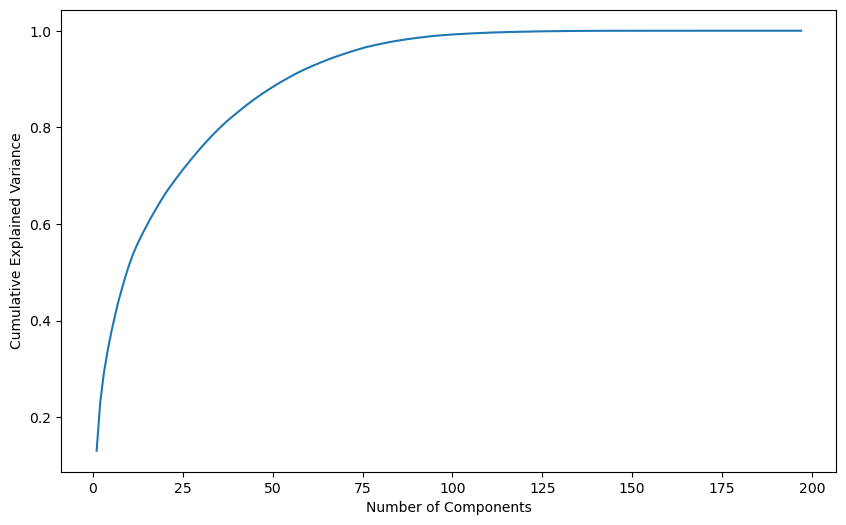

In [93]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [94]:
### So, the optimal n_component value would be 70

In [95]:
## Again doing the PCA with required no of n_components
pca = PCA(n_components=70)
X_pca = pca.fit_transform(X)

In [96]:
X_pca.shape

(167020, 70)

In [97]:
# Printing variance explained by each component
pca.explained_variance_ratio_

array([0.13037874, 0.10015386, 0.06008606, 0.04445169, 0.03781717,
       0.0336314 , 0.03149679, 0.0267787 , 0.02582816, 0.0235574 ,
       0.02078388, 0.01761698, 0.01575121, 0.01498757, 0.01428084,
       0.0138148 , 0.01292636, 0.01271628, 0.01260809, 0.01176088,
       0.01108341, 0.01028848, 0.01007403, 0.00994667, 0.00961016,
       0.00941994, 0.00919116, 0.00902244, 0.00879577, 0.00861265,
       0.00842656, 0.00807637, 0.00794427, 0.00763908, 0.00742323,
       0.0070995 , 0.00690311, 0.00653045, 0.00619967, 0.00611568,
       0.00604094, 0.00592308, 0.00586498, 0.00563388, 0.00542755,
       0.00535614, 0.00514635, 0.00495808, 0.00476639, 0.00472524,
       0.00459207, 0.00447043, 0.00425266, 0.00416843, 0.00409644,
       0.00406415, 0.00388865, 0.00361036, 0.00350924, 0.0034054 ,
       0.00327426, 0.00315547, 0.00313745, 0.00297525, 0.00296708,
       0.00285958, 0.00267967, 0.00264165, 0.00252437, 0.00247453])

#### Model Training

In [98]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

In [101]:
#### Logistic Regression

lr = LogisticRegression()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_test_pca)

In [102]:
#### Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train_pca,y_train)
y_pred_dt = dt.predict(X_test_pca)

In [103]:
#### KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_pca,y_train)
y_pred_knn = knn.predict(X_test_pca)

In [104]:
#### RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_pca,y_train)
y_pred_rf = rf.predict(X_test_pca)

In [105]:
#### AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train_pca,y_train)
y_pred_ada = ada.predict(X_test_pca)

In [106]:
#### Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train_pca,y_train)
y_pred_gb = gb.predict(X_test_pca)

In [107]:
#### XGBoost
xgb = XGBClassifier()
xgb.fit(X_train_pca,y_train)
y_pred_xgb = xgb.predict(X_test_pca)

In [112]:
model_result = {}
model_name = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'Adaboost', 'Gradient Boosting', 'XGBoost']
accuracy = [accuracy_score(y_test,y_pred_lr),
            accuracy_score(y_test,y_pred_dt),
            accuracy_score(y_test,y_pred_knn),
            accuracy_score(y_test,y_pred_rf),
            accuracy_score(y_test,y_pred_ada),
            accuracy_score(y_test,y_pred_gb),
            accuracy_score(y_test,y_pred_xgb)
           ]
precision = [precision_score(y_test,y_pred_lr),
             precision_score(y_test,y_pred_dt),
             precision_score(y_test,y_pred_knn),
             precision_score(y_test,y_pred_rf),
             precision_score(y_test,y_pred_ada),
             precision_score(y_test,y_pred_gb),
             precision_score(y_test,y_pred_xgb)
            ]
recall = [recall_score(y_test,y_pred_lr),
          recall_score(y_test,y_pred_dt),
          recall_score(y_test,y_pred_knn),
          recall_score(y_test,y_pred_rf),
          recall_score(y_test,y_pred_ada),
          recall_score(y_test,y_pred_gb),
          recall_score(y_test,y_pred_xgb)
         ]
rocauc = [roc_auc_score(y_test,y_pred_lr),
          roc_auc_score(y_test,y_pred_dt),
          roc_auc_score(y_test,y_pred_knn),
          roc_auc_score(y_test,y_pred_rf),
          roc_auc_score(y_test,y_pred_ada),
          roc_auc_score(y_test,y_pred_gb),
          roc_auc_score(y_test,y_pred_xgb)
         ]
model_result['Model Name'] = model_name
model_result['Accuracy'] = accuracy
model_result['Precision'] = precision
model_result['Recall'] = recall
model_result['AUC score'] = rocauc
Result = pd.DataFrame(model_result)

In [113]:
Result

,Model Name,Accuracy,Precision,Recall,AUC score
0,Logistic Regression,0.958957,0.957246,0.940101,0.955889
1,Decision Tree,0.857532,0.821516,0.825728,0.852357
2,KNN,0.859448,0.865072,0.771403,0.845121
3,Random Forest,0.923333,0.929174,0.876486,0.915710
4,Adaboost,0.903215,0.897566,0.857610,0.895794
5,Gradient Boosting,0.914471,0.916988,0.866082,0.906597
6,XGBoost,0.965872,0.961273,0.953701,0.963892


#### Model Hyperparameter Tuning

In [114]:
### parameter configuration
param_lr = {
    'penalty': ['l1','l2','elasticnet',None],
    'tol': [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6],
    'C': [100, 10, 1.0, 0.1, 0.01,0.001], 
    'class_weight': ['balanced',None],
    'solver': ['lbfgs','liblinear','newton-cg','saga']
}

In [127]:
#### Logistic Regression

from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
lr = LogisticRegression()
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_lr = RandomizedSearchCV(lr,param_distributions=param_lr,n_iter=5,scoring='accuracy',cv=stratified_kfold,random_state=42)
random_lr.fit(X_train_pca,y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_lr.best_params_
best_model = random_lr.best_estimator_

## Evaluate the best model
accuracies = []
auc_scores = []
for train_index, test_index in stratified_kfold.split(X_pca, y):
    X_train_pca, X_test_pca = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    best_model.fit(X_train_pca, y_train)
    y_pred = best_model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    accuracies.append(accuracy)
    auc_scores.append(auc_score)

mean_accuracy_lr = np.mean(accuracies)
std_accuracy_lr = np.std(accuracies)
auc_score_lr = np.mean(auc_scores)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Accuracy: {mean_accuracy_lr:.2f}")
print(f"Standard Deviation: {std_accuracy_lr:.2f}")
print(f"Mean AUC Score: {auc_score_lr:.2f}")

Best Hyperparameters: {'tol': 0.001, 'solver': 'saga', 'penalty': None, 'class_weight': 'balanced', 'C': 0.01}
Mean Accuracy: 0.96
Standard Deviation: 0.00
Mean AUC Score: 0.96


In [138]:
#### Decision Tree
from scipy.stats import uniform, randint
### parameter configuration
param_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': randint(10, 200),
    #'min_samples_split': [0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'max_features': ['auto', 'log2', 'sqrt'],
    #'min_samples_leaf': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'class_weight': ['balanced', None],
    #'min_impurity_decrease':[0.0001,0.001,0.01,0.1,0.2,0.3,0.5,0.8,0.9]
}




dt = DecisionTreeClassifier()
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
random_dt = RandomizedSearchCV(dt,param_distributions=param_dt,n_iter=10,scoring='accuracy',cv=stratified_kfold,random_state=42)
random_dt.fit(X_train_pca,y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_dt.best_params_
best_model = random_dt.best_estimator_

## Evaluate the best model
accuracies = []
auc_scores = []
for train_index, test_index in stratified_kfold.split(X_pca, y):
    X_train_pca, X_test_pca = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    best_model.fit(X_train_pca, y_train)
    y_pred = best_model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    accuracies.append(accuracy)
    auc_scores.append(auc_score)

mean_accuracy_dt = np.mean(accuracies)
std_accuracy_dt = np.std(accuracies)
auc_score_dt = np.mean(auc_scores)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Accuracy: {mean_accuracy_dt:.2f}")
print(f"Standard Deviation: {std_accuracy_dt:.2f}")
print(f"Mean AUC Score: {auc_score_dt:.2f}")

Best Hyperparameters: {'class_weight': None, 'criterion': 'log_loss', 'max_depth': 84, 'max_features': 'sqrt'}
Mean Accuracy: 0.82
Standard Deviation: 0.01
Mean AUC Score: 0.81


In [103]:
#### KNN
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
### parameter configuration
param_knn = {
    'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23,25,27,29],
    'weights': ['uniform','distance'],
    #'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}




knn = KNeighborsClassifier()
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
random_knn = RandomizedSearchCV(knn,param_distributions=param_knn,n_iter=2,scoring='accuracy',cv=stratified_kfold,random_state=42)
random_knn.fit(X_train_pca,y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_knn.best_params_
best_model = random_knn.best_estimator_

## Evaluate the best model
accuracies = []
auc_scores = []
for train_index, test_index in stratified_kfold.split(X_pca, y):
    X_train_pca, X_test_pca = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    best_model.fit(X_train_pca, y_train)
    y_pred = best_model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    accuracies.append(accuracy)
    auc_scores.append(auc_score)

mean_accuracy_knn = np.mean(accuracies)
std_accuracy_knn = np.std(accuracies)
auc_score_knn = np.mean(auc_scores)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Accuracy: {mean_accuracy_knn:.2f}")
print(f"Standard Deviation: {std_accuracy_knn:.2f}")
print(f"Mean AUC Score: {auc_score_knn:.2f}")

Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 19, 'metric': 'minkowski'}
Mean Accuracy: 0.88
Standard Deviation: 0.00
Mean AUC Score: 0.86


In [106]:
#### Random Forest
from scipy.stats import uniform, randint

### parameter configuration
param_rf = {
    'n_estimators': randint(10, 100),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': randint(10, 200),
    #'min_samples_split': [0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'max_features': ['auto', 'log2', 'sqrt'],
    #'min_samples_leaf': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'class_weight': ['balanced', None],
    #'min_impurity_decrease':[0.0001,0.001,0.01,0.1,0.2,0.3,0.5,0.8,0.9]
}




rf = RandomForestClassifier()
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_rf = RandomizedSearchCV(rf,param_distributions=param_rf,n_iter=2,scoring='accuracy',cv=stratified_kfold,random_state=42,n_jobs=-1)
random_rf.fit(X_train_pca,y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_rf.best_params_
best_model = random_rf.best_estimator_

## Evaluate the best model
accuracies = []
auc_scores = []
for train_index, test_index in stratified_kfold.split(X_pca, y):
    X_train_pca, X_test_pca = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    best_model.fit(X_train_pca, y_train)
    y_pred = best_model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    accuracies.append(accuracy)
    auc_scores.append(auc_score)

mean_accuracy_rf = np.mean(accuracies)
std_accuracy_rf = np.std(accuracies)
auc_score_rf = np.mean(auc_scores)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Accuracy: {mean_accuracy_rf:.2f}")
print(f"Standard Deviation: {std_accuracy_rf:.2f}")
print(f"Mean AUC Score: {auc_score_rf:.2f}")

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 24, 'max_features': 'sqrt', 'n_estimators': 81}
Mean Accuracy: 0.93
Standard Deviation: 0.00
Mean AUC Score: 0.92


In [116]:
#### AdaBoost

### parameter configuration
param_ada = {
    'n_estimators': randint(10, 100),
    'learning_rate': [0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'algorithm': ['SAMME', 'SAMME.R']
}




ada = AdaBoostClassifier()
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_ada = RandomizedSearchCV(ada,param_distributions=param_ada,n_iter=2,scoring='accuracy',cv=stratified_kfold,random_state=42,n_jobs=-1)
random_ada.fit(X_train_pca,y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_ada.best_params_
best_model = random_ada.best_estimator_

## Evaluate the best model
accuracies = []
auc_scores = []
for train_index, test_index in stratified_kfold.split(X_pca, y):
    X_train_pca, X_test_pca = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    best_model.fit(X_train_pca, y_train)
    y_pred = best_model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    accuracies.append(accuracy)
    auc_scores.append(auc_score)

mean_accuracy_ada = np.mean(accuracies)
std_accuracy_ada = np.std(accuracies)
auc_score_ada = np.mean(auc_scores)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Accuracy: {mean_accuracy_ada:.2f}")
print(f"Standard Deviation: {std_accuracy_ada:.2f}")
print(f"Mean AUC Score: {auc_score_ada:.2f}")

Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 70}
Mean Accuracy: 0.89
Standard Deviation: 0.00
Mean AUC Score: 0.88


In [ ]:
#### GradientBoosting

### parameter configuration
param_gb = {
    'n_estimators': randint(10, 100),
    'learning_rate': [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'loss': ['log_loss','exponential'],
    'subsample': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'max_depth': randint(10, 200),
    'max_features':['sqrt','log2',None],
    'tol': [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
}




gb = GradientBoostingClassifier()
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_gb = RandomizedSearchCV(gb,param_distributions=param_gb,n_iter=2,scoring='accuracy',cv=stratified_kfold,random_state=42,n_jobs=-1)
random_gb.fit(X_train_pca,y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_gb.best_params_
best_model = random_gb.best_estimator_

## Evaluate the best model
accuracies = []
auc_scores = []
for train_index, test_index in stratified_kfold.split(X_pca, y):
    X_train_pca, X_test_pca = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    best_model.fit(X_train_pca, y_train)
    y_pred = best_model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    accuracies.append(accuracy)
    auc_scores.append(auc_score)

mean_accuracy_gb = np.mean(accuracies)
std_accuracy_gb = np.std(accuracies)
auc_score_gb = np.mean(auc_scores)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Accuracy: {mean_accuracy_gb:.2f}")
print(f"Standard Deviation: {std_accuracy_gb:.2f}")
print(f"Mean AUC Score: {auc_score_gb:.2f}")

In [ ]:
1+2

In [ ]:
#### XGBoost

### parameter configuration
param_xgb = {
    'n_estimators': randint(10, 100),
    'learning_rate': [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'loss': ['log_loss','exponential'],
    'subsample': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'max_depth': randint(10, 200),
    'max_features':['sqrt','log2',None],
    'tol': [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
}




xgb = XGBClassifier()
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_xgb = RandomizedSearchCV(xgb,param_distributions=param_xgb,n_iter=2,scoring='accuracy',cv=stratified_kfold,random_state=42,n_jobs=-1)
random_xgb.fit(X_train_pca,y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_xgb.best_params_
best_model = random_xgb.best_estimator_

## Evaluate the best model
accuracies = []
auc_scores = []
for train_index, test_index in stratified_kfold.split(X_pca, y):
    X_train_pca, X_test_pca = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    best_model.fit(X_train_pca, y_train)
    y_pred = best_model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    accuracies.append(accuracy)
    auc_scores.append(auc_score)

mean_accuracy_xgb = np.mean(accuracies)
std_accuracy_xgb = np.std(accuracies)
auc_score_xgb = np.mean(auc_scores)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Accuracy: {mean_accuracy_xgb:.2f}")
print(f"Standard Deviation: {std_accuracy_xgb:.2f}")
print(f"Mean AUC Score: {auc_score_xgb:.2f}")